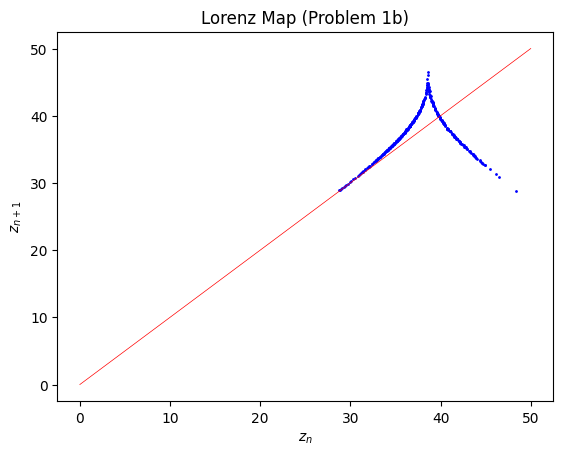

Problem 1c:
Closest z-value: 39.91 at index 327

Problem 1d:
Time-series index: 24231 at t = 242.32


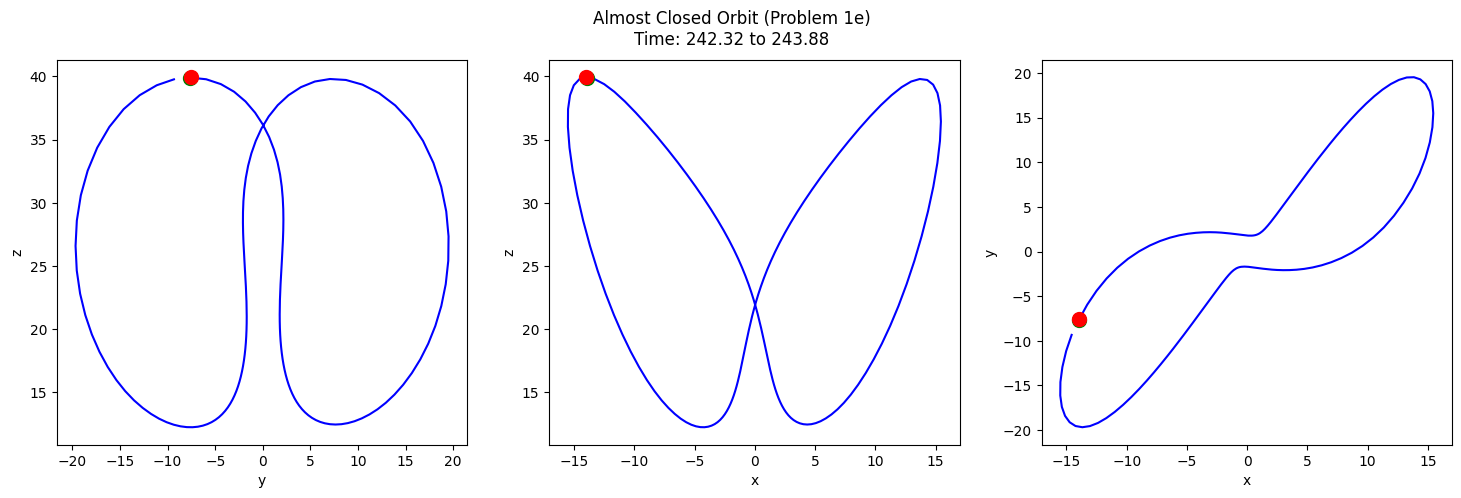

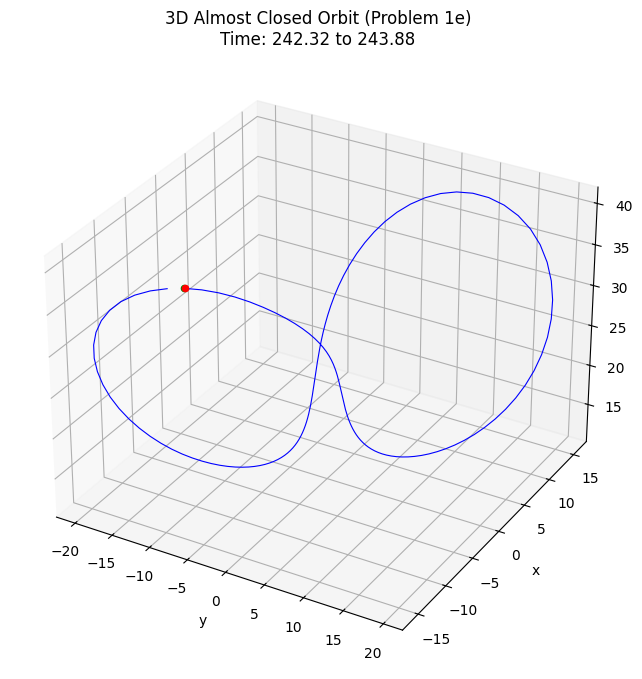

In [45]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Problem 1a: Numerical solution
def lorenz_rhs(t, state):
    x, y, z = state
    σ, r, b = 10.0, 28.0, 8/3
    dxdt = σ*(y - x)
    dydt = r*x - y - x*z
    dzdt = x*y - b*z
    return [dxdt, dydt, dzdt]  

y0 = [0.0, 1.0, 0.0]
t_span = (0, 300)
tvals = np.linspace(0, 300, 30000)
solution = solve_ivp(lorenz_rhs, t_span, y0, t_eval=tvals)
x, y, z = solution.y

# Problem 1b: Find and Plot Peaks
peaks, _ = find_peaks(z, height=20, distance=50)  
z_peaks = z[peaks]

plt.plot(z_peaks[:-1], z_peaks[1:], 'b.', markersize=2)
plt.plot([0, 50], [0, 50], 'r-', lw=0.5)
plt.xlabel('$z_n$')
plt.ylabel('$z_{n+1}$')
plt.title('Lorenz Map (Problem 1b)')
plt.show()

# Problem 1c: Find closest to z_{n+1}=z_n
differences = np.abs(np.diff(z_peaks))
closest_idx = np.argmin(differences)
z_closest = z_peaks[closest_idx]
print(f"Problem 1c:\nClosest z-value: {z_closest:.2f} at index {closest_idx}")

# Problem 1d: Find time-series index
ts_index = peaks[closest_idx]
t_value = tvals[ts_index]
print(f"\nProblem 1d:\nTime-series index: {ts_index} at t = {t_value:.2f}")


# Problem 1e: Almost closed orbit
start_idx = ts_index
distances = np.sqrt((x[start_idx:] - x[start_idx])**2 +
                (y[start_idx:] - y[start_idx])**2 +
                (z[start_idx:] - z[start_idx])**2)

period_idx = np.argmin(distances[1:]) + 1
end_idx = start_idx + period_idx
t_start, t_end = tvals[start_idx], tvals[end_idx]

# Plotting projections
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# y-z projection
axs[0].plot(y[start_idx:end_idx], z[start_idx:end_idx], 'b-')
axs[0].plot(y[start_idx], z[start_idx], 'go', markersize=10)
axs[0].plot(y[end_idx], z[end_idx], 'ro', markersize=10)
axs[0].set_xlabel('y')
axs[0].set_ylabel('z')

# x-z projection
axs[1].plot(x[start_idx:end_idx], z[start_idx:end_idx], 'b-')
axs[1].plot(x[start_idx], z[start_idx], 'go', markersize=10)
axs[1].plot(x[end_idx], z[end_idx], 'ro', markersize=10)
axs[1].set_xlabel('x')
axs[1].set_ylabel('z')

# x-y projection
axs[2].plot(x[start_idx:end_idx], y[start_idx:end_idx], 'b-')
axs[2].plot(x[start_idx], y[start_idx], 'go', markersize=10)
axs[2].plot(x[end_idx], y[end_idx], 'ro', markersize=10)
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')

plt.suptitle(f'Almost Closed Orbit (Problem 1e)\nTime: {t_start:.2f} to {t_end:.2f}')
plt.show()

# Plot the 3D trajectory 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
ax.plot(y[start_idx:end_idx], x[start_idx:end_idx], z[start_idx:end_idx],'b-', linewidth=0.8)
ax.scatter(y[start_idx], x[start_idx], z[start_idx], c='green')
ax.scatter(y[end_idx], x[end_idx], z[end_idx], c='red')
ax.set_xlabel('y')
ax.set_ylabel('x')
ax.set_zlabel('z')
ax.set_title(f'3D Almost Closed Orbit (Problem 1e)\nTime: {t_start:.2f} to {t_end:.2f}')
plt.show()

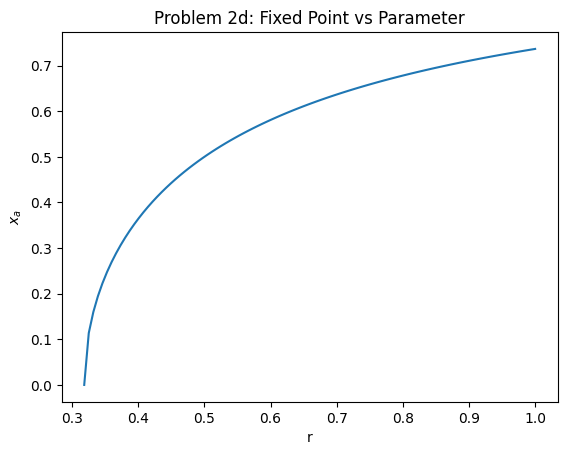

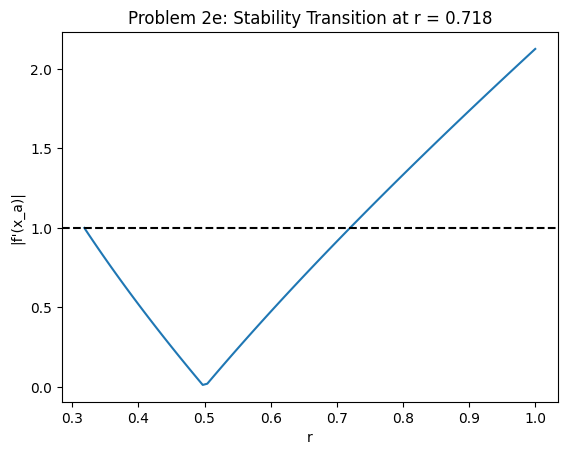

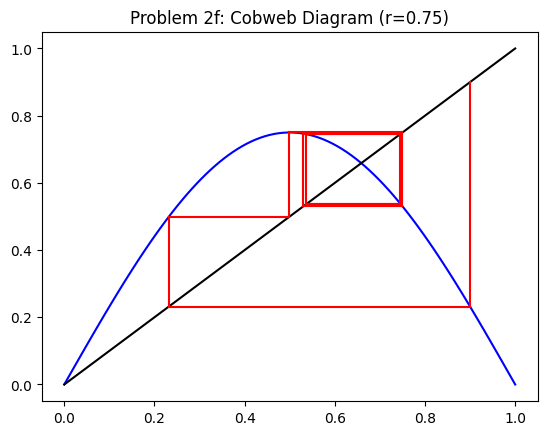

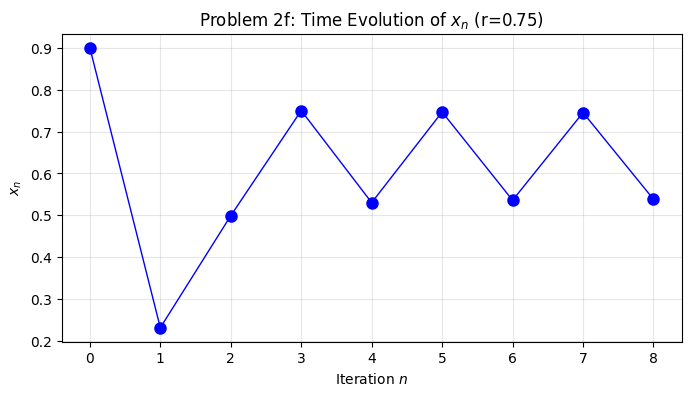

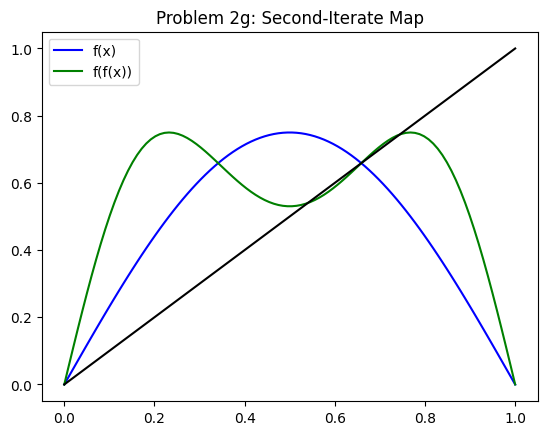

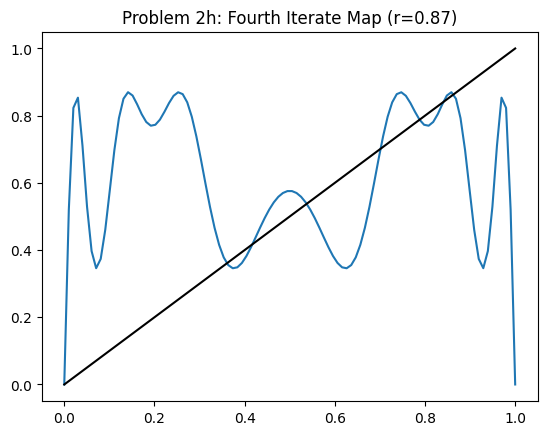

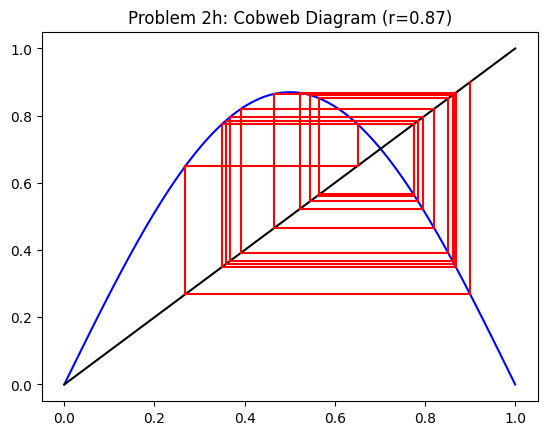

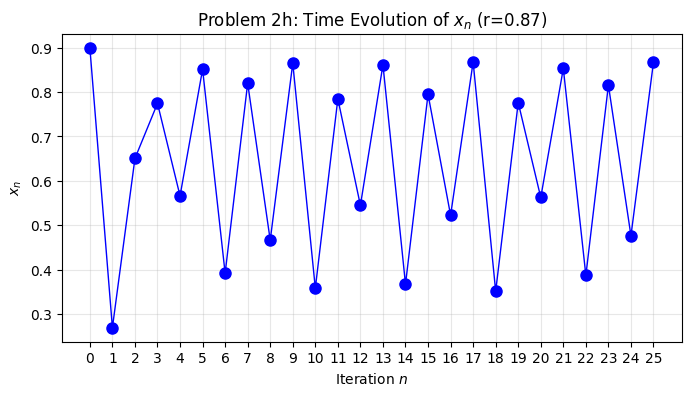

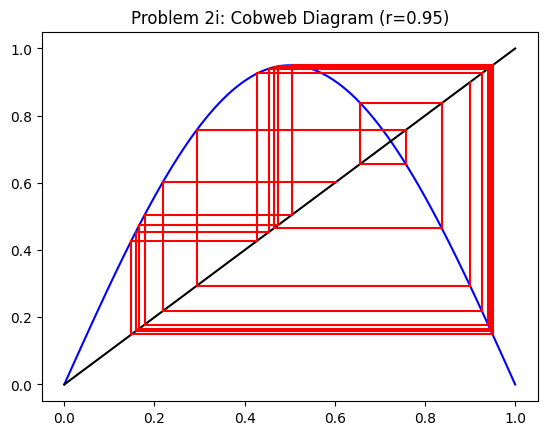

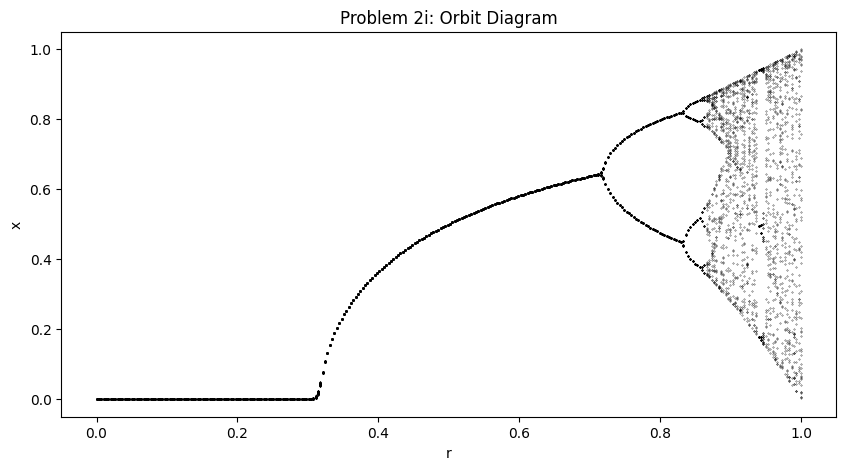

In [46]:


# Problem 2b-d: Fixed point analysis
r_c = 1/np.pi
def find_fixed_point(r):
    from scipy.optimize import fsolve
    func = lambda x: x - r*np.sin(np.pi*x)
    x_guess = 0.5 if r > 0.3 else 0.01
    return fsolve(func, x_guess)[0]

r_values = np.linspace(r_c, 1, 100)
x_a = [find_fixed_point(r) for r in r_values]

# Problem 2d: Plot x_a vs r
plt.figure()
plt.plot(r_values, x_a)
plt.xlabel('r')
plt.ylabel('$x_a$')
plt.title('Problem 2d: Fixed Point vs Parameter')
plt.show()

# Problem 2e: Stability analysis
derivatives = [r*np.pi*np.cos(np.pi*x) for r, x in zip(r_values, x_a)]

#Stability transition
crossing_idx = np.where(np.diff(np.sign(np.abs(derivatives) - 1)))[0][0]
r_transition = r_values[crossing_idx]

plt.figure()
plt.plot(r_values, np.abs(derivatives))
plt.axhline(1, color='k', linestyle='--')
plt.xlabel('r')
plt.ylabel('|f\'(x_a)|')
plt.title(f'Problem 2e: Stability Transition at r = {r_transition:.3f}')
plt.show()

# Problem 2f: Cobweb diagram (r=0.75)
def cobweb(r, x0=0.9, n=8,letter='f'):
    x = [x0]
    for _ in range(n):
        x.append(r*np.sin(np.pi*x[-1]))
    
    plt.figure()
    x_range = np.linspace(0,1,100)
    plt.plot(x_range, r*np.sin(np.pi*x_range), 'b-')
    plt.plot(x_range, x_range, 'k-')
    
    for i in range(n):
        plt.plot([x[i], x[i]], [x[i], x[i+1]], 'r-')
        plt.plot([x[i], x[i+1]], [x[i+1], x[i+1]], 'r-')    
    plt.title(f'Problem 2{letter}: Cobweb Diagram (r={r})')
    plt.show()

cobweb(0.75,letter='f')
r = 0.75
n_steps = 8
x_vals = [0.9]
for _ in range(n_steps):
    x_vals.append(r * np.sin(np.pi * x_vals[-1]))
plt.figure(figsize=(8, 4))
plt.plot(x_vals, 'bo-', markersize=8, linewidth=1)
plt.xticks(range(n_steps+1))
plt.xlabel('Iteration $n$')
plt.ylabel('$x_n$')
plt.title('Problem 2f: Time Evolution of $x_n$ (r=0.75)')
plt.grid(True, alpha=0.3)
plt.show()

# Problem 2g: Second-iterate map
def second_iterate(x, r):
    return r*np.sin(np.pi*r*np.sin(np.pi*x))
r=0.75
x_range = np.linspace(0,1,100)
plt.figure()
plt.plot(x_range, r*np.sin(np.pi*x_range), 'b-', label='f(x)')
plt.plot(x_range, second_iterate(x_range, 0.75), 'g-', label='f(f(x))')
plt.plot(x_range, x_range, 'k-')
plt.title('Problem 2g: Second-Iterate Map')
plt.legend()
plt.show()

# Problem 2h: Period-4 orbit
r_period4 = 0.87  #numerical experimentation
def fourth_iterate(x, r):
    return second_iterate(second_iterate(x, r), r)

plt.figure()
plt.plot(x_range, fourth_iterate(x_range, r_period4))
plt.plot(x_range, x_range, 'k-')
plt.title(f'Problem 2h: Fourth Iterate Map (r={r_period4})')
plt.show()
cobweb(0.87, n=20,letter='h')
r = 0.87
n_steps = 25
x_vals = [0.9] 
for _ in range(n_steps):
    x_vals.append(r * np.sin(np.pi * x_vals[-1]))
plt.figure(figsize=(8, 4))
plt.plot(x_vals, 'bo-', markersize=8, linewidth=1)
plt.xticks(range(n_steps+1))
plt.xlabel('Iteration $n$')
plt.ylabel('$x_n$')
plt.title('Problem 2h: Time Evolution of $x_n$ (r=0.87)')
plt.grid(True, alpha=0.3)
plt.show()

# Problem 2i: Chaos example
# Cobweb for r=0.95
cobweb(0.95, n=20,letter='i')
plt.figure(figsize=(10,5))
for r in np.linspace(0, 1, 300):
    x = 0.5
    for _ in range(100):
        x = r*np.sin(np.pi*x)
    for _ in range(50):
        x = r*np.sin(np.pi*x)
        plt.plot(r, x, 'k.', markersize=0.5)

plt.xlabel('r')
plt.ylabel('x')
plt.title('Problem 2i: Orbit Diagram')
plt.show()